# Предобработка данных

In [1]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# !conda install -c conda-forge lightgbm
from lightgbm import LGBMRegressor


# 4. Метирки качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [2]:
import warnings

warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [3]:
TEST_PATH = 'C:/Users/Alice/Desktop/Библиотеки python/Курсовой проект/test.csv'
TRAIN_PATH = 'C:/Users/Alice/Desktop/Библиотеки python/Курсовой проект/train.csv'
PREPARED_DATASET_PATH = 'C:/Users/Alice/Desktop/Библиотеки python/Курсовой проект/prepared_dataset.csv'
PREDICTIONS_PATH = 'C:/Users/Alice/Desktop/Библиотеки python/Курсовой проект/AKulakova_predictions.csv'

In [4]:
df = pd.read_csv(TRAIN_PATH) #датасет train
X_final = pd.read_csv(TEST_PATH) #датасет test

In [5]:
# файл с предсказаниями
preds_final = pd.DataFrame()
preds_final['Id'] = X_final['Id'].copy()

## Описание датасета

Id - идентификационный номер квартиры
DistrictId - идентификационный номер района
Rooms - количество комнат
Square - площадь
LifeSquare - жилая площадь
KitchenSquare - площадь кухни
Floor - этаж
HouseFloor - количество этажей в доме
HouseYear - год постройки дома
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
Social_1, Social_2, Social_3 - социальные показатели местности
Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
Price - цена квартиры

In [6]:
df = pd.read_csv(TRAIN_PATH)
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [7]:
X_final.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,NaN,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


In [8]:
df.shape

(10000, 20)

In [9]:
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [10]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

## Обзор количественных переменных

In [11]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


In [12]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Анализ признаков

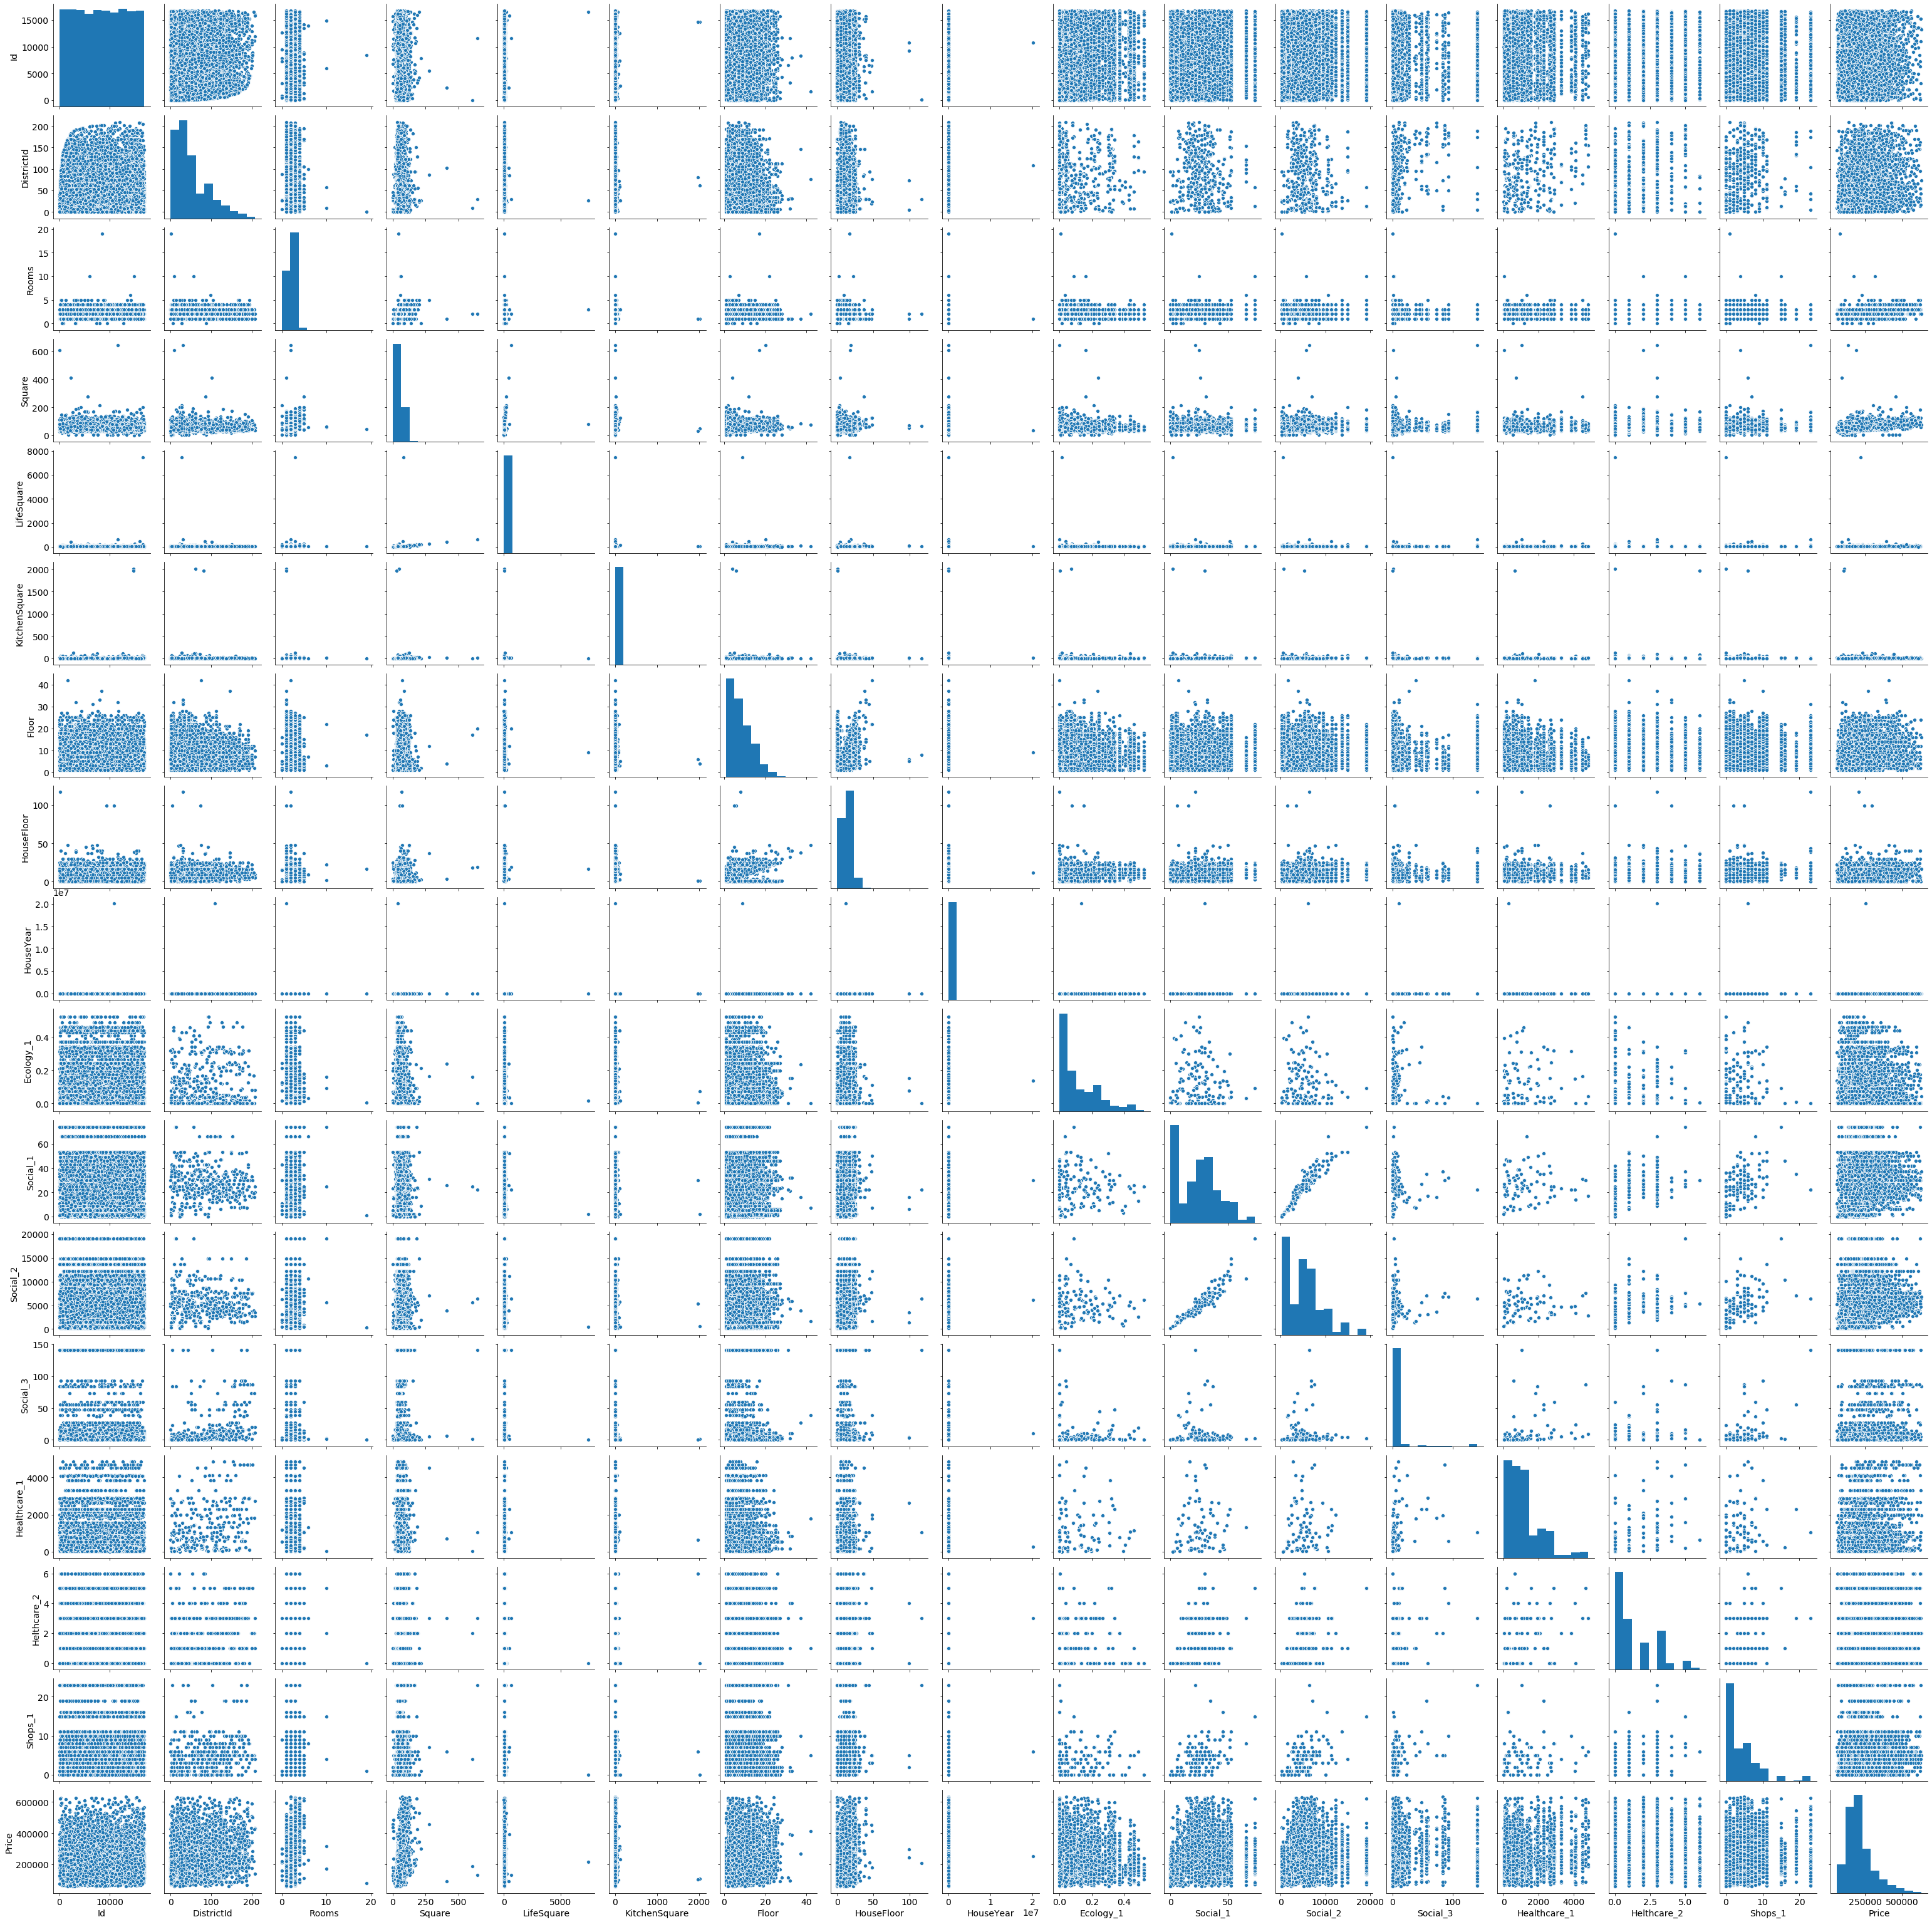

In [13]:
sns.pairplot(df_num_features);

### Матрица корреляций

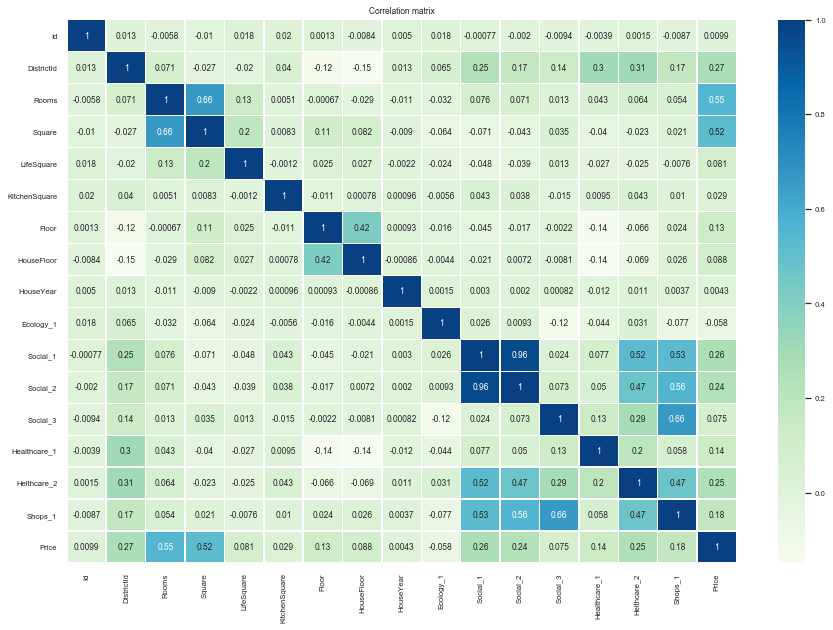

In [14]:
plt.figure(figsize = (15,10))

sns.set(font_scale=0.7)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

## Обзор категориальных переменных

In [15]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [16]:
X_final_obj_features = X_final.select_dtypes(include='object')
X_final_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,A


In [17]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [18]:
X_final['Ecology_2'].value_counts()

B    4952
A      48
Name: Ecology_2, dtype: int64

In [19]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [20]:
X_final['Ecology_3'].value_counts()

B    4851
A     149
Name: Ecology_3, dtype: int64

In [21]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [22]:
X_final['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

## Обработка пропусков

In [23]:
df.shape[0]

10000

In [24]:
df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [25]:
X_final.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [26]:
median = df['LifeSquare'].median()

df['LifeSquare'] = df['LifeSquare'].fillna(median)

In [27]:
X_final['LifeSquare'] = X_final['LifeSquare'].fillna(median)

In [28]:
median = df['Healthcare_1'].median()

df['Healthcare_1'] = df['Healthcare_1'].fillna(median)

In [29]:
X_final['Healthcare_1'] = X_final['Healthcare_1'].fillna(median)

In [30]:
df.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [31]:
X_final.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

## Обработка выбросов

In [32]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [33]:
df[df['Rooms'] <= 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,900.0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,900.0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,32.781260,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,32.781260,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,32.781260,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,900.0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,900.0,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,219281.918007


In [34]:
df.loc[df['Rooms'] <= 0, 'Rooms'] = df['Rooms'].median()
X_final.loc[X_final['Rooms'] <= 0, 'Rooms'] = df['Rooms'].median()

In [35]:
df[df['KitchenSquare'] <= 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
7,11993,74,2.0,80.312926,32.781260,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,221244.156664
23,6641,54,3.0,118.907612,32.781260,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
39,9371,23,2.0,60.503248,32.781260,0.0,16,0.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,229778.057902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,8438,1,2.0,66.736039,32.781260,0.0,16,17.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,199237.847364
9953,5365,1,2.0,61.049491,32.781260,0.0,11,17.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,190085.168584
9960,9307,1,2.0,57.376642,32.781260,0.0,8,25.0,2016,0.007122,B,B,1,264,0,900.0,0,1,B,104450.496477
9965,6612,27,2.0,59.460685,32.781260,0.0,15,19.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,135784.320930


In [36]:
df.loc[df['KitchenSquare'] <= 0, 'KitchenSquare'] = df['KitchenSquare'].median()
X_final.loc[X_final['KitchenSquare'] <= 0, 'KitchenSquare'] = df['KitchenSquare'].median()

In [37]:
df[df['HouseFloor'] <= 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,32.781260,6.0,14,0.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,221244.156664
23,6641,54,3.0,118.907612,32.781260,6.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,6.0,17,0.0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
39,9371,23,2.0,60.503248,32.781260,6.0,16,0.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,229778.057902
44,10521,38,3.0,104.211396,106.340403,6.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,12302,30,1.0,46.072913,48.307844,6.0,4,0.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,161403.094034
9769,9384,59,3.0,98.607328,32.781260,6.0,14,0.0,1977,0.019509,B,B,37,7687,11,176.0,5,5,B,492700.257473
9878,11441,62,2.0,71.985335,72.453232,6.0,5,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,158841.624543
9908,3171,62,1.0,35.873961,32.781260,6.0,25,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,134379.130962


In [38]:
df.loc[df['HouseFloor'] <= 0, 'HouseFloor'] = df['HouseFloor'].median()
X_final.loc[X_final['HouseFloor'] <= 0, 'HouseFloor'] = df['HouseFloor'].median()

In [39]:
df.loc[df['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515
8599,9300,74,2.0,71.747869,74.579809,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,243329.912579
8854,78,30,2.0,65.773749,66.811789,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520


In [40]:
df.loc[df['HouseFloor'] > 50, 'HouseFloor'] = df['HouseFloor'].median()
X_final.loc[X_final['HouseFloor'] > 50, 'HouseFloor'] = df['HouseFloor'].median()

In [41]:
df[df['Floor'] > df['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,32.781260,6.0,14,13.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,221244.156664
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,140647.565937
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,900.0,0,0,B,117000.381287
21,11935,27,2.0,64.711835,32.781260,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,127200.026511
26,4378,27,3.0,106.958871,0.641822,6.0,17,13.0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3.0,64.074977,47.633428,6.0,11,9.0,1983,0.371149,B,B,34,7065,1,750.0,2,5,B,226434.880156
9985,16159,27,1.0,38.968338,32.781260,1.0,10,1.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,95529.569405
9989,4145,96,3.0,90.055233,47.860231,11.0,26,24.0,2005,0.041116,B,B,53,14892,4,900.0,1,4,B,441108.911237
9991,11553,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,B,B,37,5288,0,1937.0,3,2,B,212883.501504


In [42]:
df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df['HouseFloor']
X_final.loc[X_final['Floor'] > X_final['HouseFloor'], 'Floor'] = df['HouseFloor']

In [43]:
df[df['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9.0,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4.0,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [44]:
df.loc[df['HouseYear'] > 2020, 'HouseYear'] = df['HouseYear'].median()
X_final.loc[X_final['HouseYear'] > 2020, 'HouseYear'] = df['HouseYear'].median()

## Постороение новых признаков

In [45]:
# для train
df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
df.rename(columns={'A': 'Ecology_2_A', 'B': 'Ecology_2_B'}, inplace=True)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,...,33,7976,5,900.0,0,11,B,184966.930730,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,...,46,10309,1,240.0,1,16,B,300009.450063,0,1
2,4765,53,2.0,44.947953,29.197612,6.0,8.0,12.0,1968.0,0.049637,...,34,7759,0,229.0,1,3,B,220925.908524,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,...,23,5735,3,1084.0,0,5,B,175616.227217,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,...,35,5776,1,2078.0,2,4,B,150226.531644,0,1


In [46]:
df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis=1)
df.rename(columns={'A': 'Ecology_3_A', 'B': 'Ecology_3_B'}, inplace=True)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,...,5,900.0,0,11,B,184966.930730,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,...,1,240.0,1,16,B,300009.450063,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,6.0,8.0,12.0,1968.0,0.049637,...,0,229.0,1,3,B,220925.908524,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,...,3,1084.0,0,5,B,175616.227217,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,...,1,2078.0,2,4,B,150226.531644,0,1,0,1


In [47]:
df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)
df.rename(columns={'A': 'Shops_2_A', 'B': 'Shops_2_B'}, inplace=True)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,...,0,11,B,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,...,1,16,B,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,6.0,8.0,12.0,1968.0,0.049637,...,1,3,B,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,...,0,5,B,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,...,2,4,B,150226.531644,0,1,0,1,0,1


In [48]:
# то же самое для test
X_final = pd.concat([X_final, pd.get_dummies(X_final['Ecology_2'])], axis=1)
X_final.rename(columns={'A': 'Ecology_2_A', 'B': 'Ecology_2_B'}, inplace=True)

In [49]:
X_final = pd.concat([X_final, pd.get_dummies(X_final['Ecology_3'])], axis=1)
X_final.rename(columns={'A': 'Ecology_3_A', 'B': 'Ecology_3_B'}, inplace=True)

In [50]:
X_final = pd.concat([X_final, pd.get_dummies(X_final['Shops_2'])], axis=1)
X_final.rename(columns={'A': 'Shops_2_A', 'B': 'Shops_2_B'}, inplace=True)

## Удаление лишних столбцов

In [51]:
del df['Id']
del df['Ecology_2']
del df['Ecology_3']
del df['Shops_2']
del X_final['Id']
del X_final['Ecology_2']
del X_final['Ecology_3']
del X_final['Shops_2']

In [52]:
df.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Price',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

In [53]:
feature_names = ['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

target_name = 'Price'

In [54]:
df = df[feature_names + [target_name]]
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,33,...,900.0,0,11,0,1,0,1,0,1,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,46,...,240.0,1,16,0,1,0,1,0,1,300009.450063
2,53,2.0,44.947953,29.197612,6.0,8.0,12.0,1968.0,0.049637,34,...,229.0,1,3,0,1,0,1,0,1,220925.908524
3,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,23,...,1084.0,0,5,0,1,0,1,0,1,175616.227217
4,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,35,...,2078.0,2,4,0,1,0,1,0,1,150226.531644


In [55]:
X_final.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972.0,0.310199,11,...,1,900.0,0,0,0,1,0,1,0,1
1,74,2.0,69.263183,32.781260,1.0,9.0,1.0,1977.0,0.075779,6,...,3,900.0,0,2,0,1,0,1,0,1
2,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909.0,0.000000,30,...,87,4702.0,5,5,0,1,0,1,0,1
3,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007.0,0.101872,23,...,3,900.0,3,3,0,1,0,1,0,1
4,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017.0,0.072158,2,...,1,900.0,0,0,0,1,0,1,1,0


In [56]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8') #сохранение обучающего датасета

In [57]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [58]:
X_train = df[feature_names]
y_train = df[target_name]

### Предсказание целевой переменной. Модель LGBMRegressor

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
R2:	0.88
RMSE:	32191.799
MSE:	1036311897.057


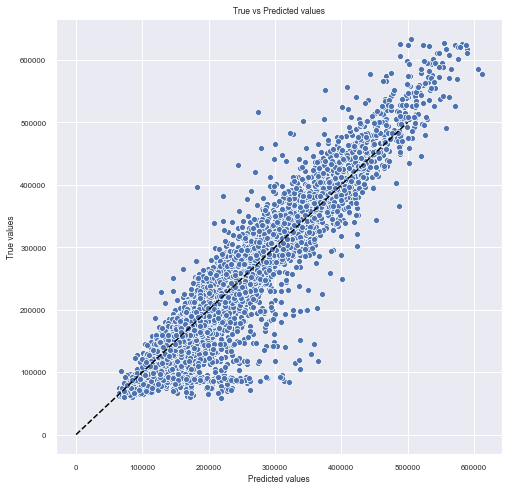

In [59]:
lgb_model = LGBMRegressor(criterion='mse',
                        max_depth=7, # Неглубокие < 10
                        min_samples_leaf=10,
                        random_state=7, 
                        n_estimators=185)

lgb_model.fit(X_train, y_train)

y_train_preds = lgb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

In [60]:
y_test_preds = lgb_model.predict(X_final)
preds_final['Price'] = y_test_preds
preds_final.to_csv(PREDICTIONS_PATH, index=False)

preds_final.head()

,Id,Price
0,725,159172.891820
1,15856,219873.234501
2,5480,229310.938865
3,15664,359961.779870
4,14275,142346.881871
